### Regression Classification Pipeline

In [1]:
#############################################
# 📌 FULL PIPELINE: Regression + Classification
# Dataset 1: advertising_and_sales_clean.csv (Regression)
# Dataset 2: telecom_churn_clean.csv (Classification)
#############################################

# === 1. Imports Libraries===
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
)

### Load Datasets

In [2]:
#############################################
# === 2. Load Datasets ===
#############################################
reg_path = r"C:/Users/USER-PC/advertising_and_sales_clean.csv"
clf_path = r"C:/Users/USER-PC/telecom_churn_clean.csv"

reg_df = pd.read_csv(reg_path)
clf_df = pd.read_csv(clf_path)

### Regression Preprocessing

In [3]:
#############################################
# === 3. Data Cleaning & Preprocessing ===
#############################################
# === 3a. Regression Preprocessing ===
reg_df = reg_df.drop_duplicates()
reg_target = "sales"  # target column
X_reg = reg_df.drop(columns=[reg_target])
y_reg = reg_df[reg_target]

numeric_features_reg = X_reg.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_features_reg = X_reg.select_dtypes(include=["object"]).columns.tolist()

preprocessor_reg = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_features_reg),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_features_reg)
])

reg_model = Pipeline([
    ("preprocessor", preprocessor_reg),
    ("model", LinearRegression())
])


### Classification Preprocessing

In [4]:
# === 3b. Classification Preprocessing ===
clf_df = clf_df.drop_duplicates()

# Convert churn numeric target (0/1) → text labels if needed
if clf_df["churn"].dtype != "object":
    clf_df["churn"] = clf_df["churn"].map({0:"No", 1:"Yes"})

X_clf = clf_df.drop(columns=["churn"])
y_clf = clf_df["churn"]

numeric_features_clf = X_clf.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_features_clf = X_clf.select_dtypes(include=["object"]).columns.tolist()

preprocessor_clf = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_features_clf),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_features_clf)
])

clf_model = Pipeline([
    ("preprocessor", preprocessor_clf),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])


### Exploratory Data Analysis (EDA)

Regression Data Overview:
         tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18

Summary Stats:
                   tv         radio  social_media          sales
count    4546.000000   4546.000000   4546.000000    4546.000000
mean    54062.912451  18157.533110   3323.472829  192413.332112
std     26104.941838   9663.259642   2211.253915   93019.873216
min     10000.000000      0.680000      0.030000   31199.410000
25%     32000.000000  10555.355000   1530.822500  112434.610000
50%     53000.000000  17859.515000   3055.565000  188963.680000
75%     77000.000000  25640.605000   4804.922500  272324.240000
max    100000.000000  48871.160000  13981.660000  364079.750000


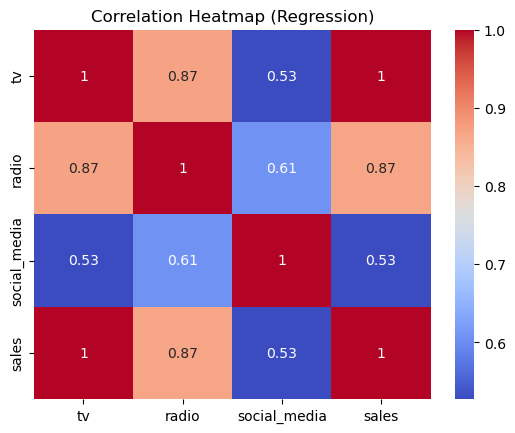

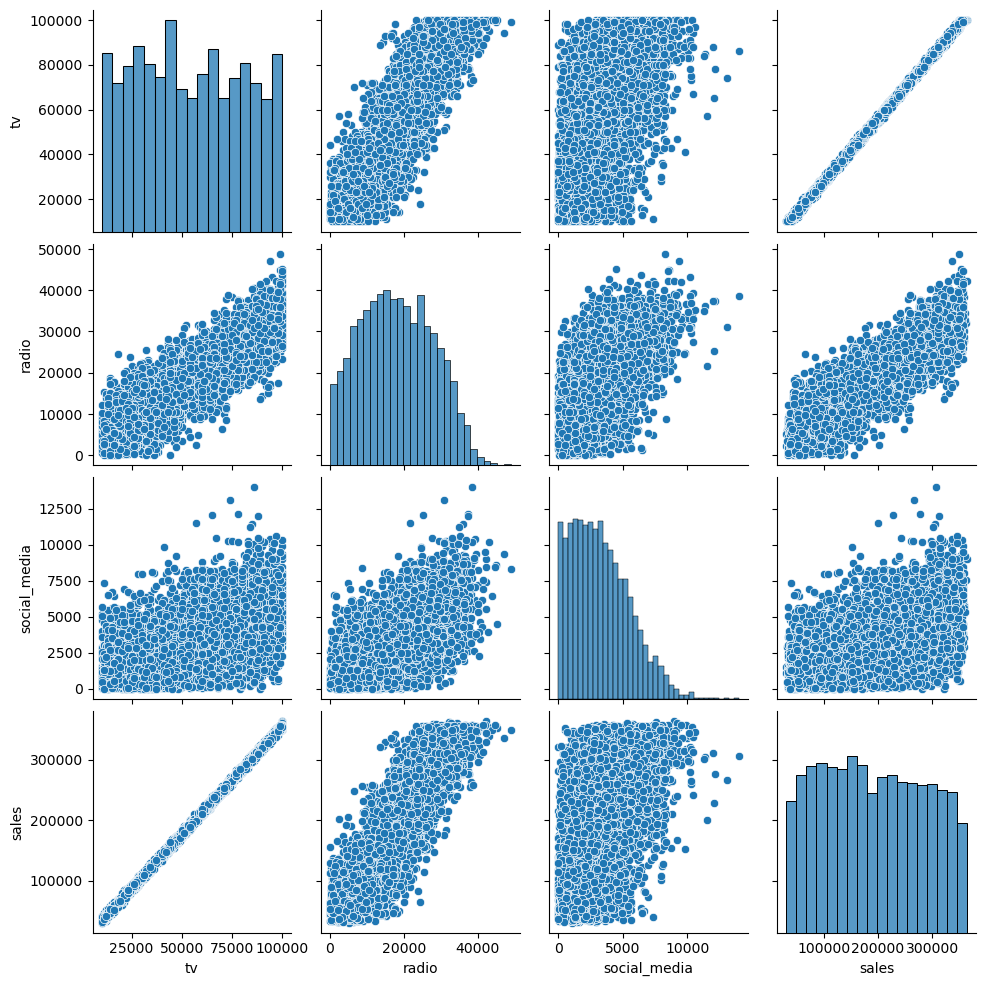

In [5]:
#############################################
# === 4. Exploratory Data Analysis (EDA) ===
#############################################

# --- Regression EDA ---
print("Regression Data Overview:\n", reg_df.head())
print("\nSummary Stats:\n", reg_df.describe())

# Only numeric columns for correlation heatmap
num_cols_reg = reg_df.select_dtypes(include=[np.number])

sns.heatmap(num_cols_reg.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Regression)")
plt.show()

# Pairplot only on numeric columns (optional: include target 'sales')
sns.pairplot(num_cols_reg)
plt.show()



### Train-Test Split

In [6]:
#############################################
# === 5. Train-Test Split ===
#############################################
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, stratify=y_clf, random_state=42
)


### Model Training

In [7]:
#############################################
# === 6. Model Training ===
#############################################
# --- Regression ---
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# --- Classification ---
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)
y_prob_clf = clf_model.predict_proba(X_test_clf)[:,1]


### Evaluation


=== Regression Metrics ===
MAE: 2312.857462694069
MSE: 8322668.25089069
RMSE: 2884.90350807279
R²: 0.9990104321095017


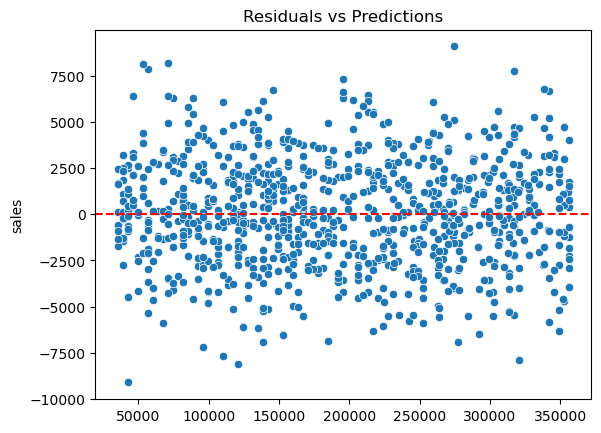


=== Classification Metrics ===
Accuracy: 0.7616191904047976
Precision: 0.35096153846153844
Recall: 0.7525773195876289
F1: 0.4786885245901639
ROC-AUC: 0.8135467534816422

Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.76      0.85       570
         Yes       0.35      0.75      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.76      0.79       667



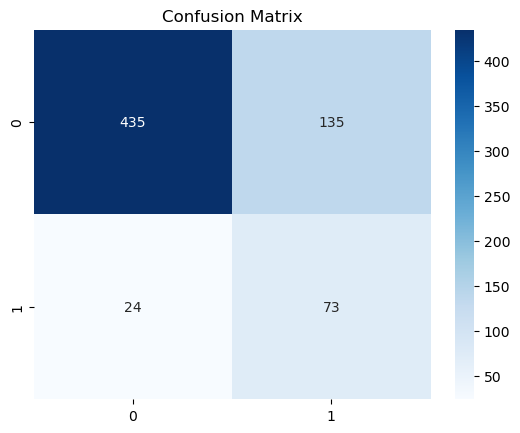

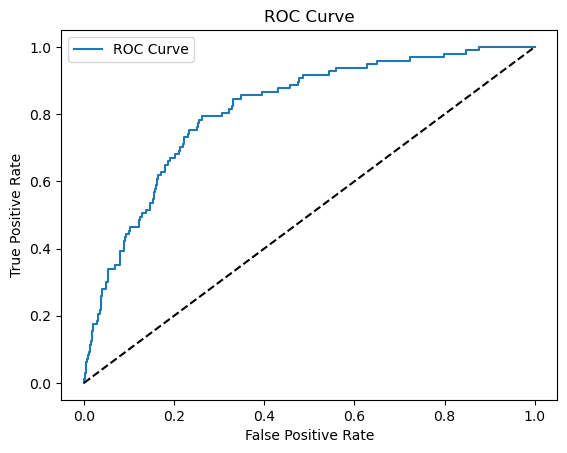

In [8]:
#############################################
# === 7. Evaluation ===
#############################################
# --- Regression Metrics ---
print("\n=== Regression Metrics ===")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R²:", r2_score(y_test_reg, y_pred_reg))

# Residual Plot
sns.scatterplot(x=y_pred_reg, y=y_test_reg - y_pred_reg)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predictions")
plt.show()

# --- Classification Metrics ---
print("\n=== Classification Metrics ===")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("Precision:", precision_score(y_test_clf, y_pred_clf, pos_label="Yes"))
print("Recall:", recall_score(y_test_clf, y_pred_clf, pos_label="Yes"))
print("F1:", f1_score(y_test_clf, y_pred_clf, pos_label="Yes"))
print("ROC-AUC:", roc_auc_score(y_test_clf.map({"No":0,"Yes":1}), y_prob_clf))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_clf, y_pred_clf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_clf.map({"No":0,"Yes":1}), y_prob_clf)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Cross Validation

In [9]:
#############################################
# === 8. Cross Validation ===
#############################################
cv_scores = cross_val_score(reg_model, X_reg, y_reg, cv=5, scoring="r2")
print("\n5-Fold CV R² (Regression):", cv_scores)
print("Mean:", cv_scores.mean())



5-Fold CV R² (Regression): [0.99899969 0.9989855  0.99901642 0.99900741 0.9989469 ]
Mean: 0.9989911839120069
